In [53]:
!unzip "/content/traffic.zip"

unzip:  cannot find or open /content/traffic.zip, /content/traffic.zip.zip or /content/traffic.zip.ZIP.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("/content/traffic.csv")

In [56]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [57]:
df.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


#1. Total and daily Page view

In [58]:
df['event'].value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


In [59]:
pageview_events = df[df['event'] == 'pageview']

total_pageviews = pageview_events.shape[0]
print(f"Total Pageviews: {total_pageviews}")

daily_pageviews = pageview_events.groupby('date').size()
print("Daily Pageviews:")
print(daily_pageviews)

average_pageviews = daily_pageviews.mean()
print(f"Average Pageviews per Day: {average_pageviews}")

Total Pageviews: 142015
Daily Pageviews:
date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
dtype: int64
Average Pageviews per Day: 20287.85714285714


<ipython-input-60-295837301ef6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')


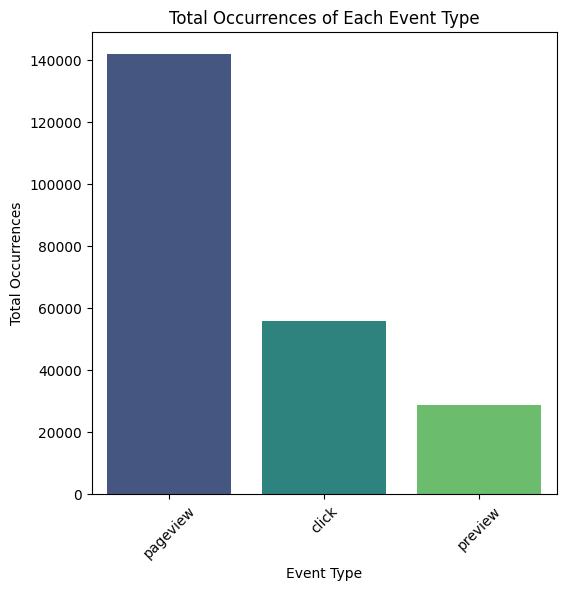

In [60]:

event_counts = df['event'].value_counts()

daily_event_counts = df.groupby(['event', 'date']).size().unstack(fill_value=0)

average_daily_events = daily_event_counts.mean(axis=1)

# Plotting the graphs

plt.figure(figsize=(6,6))
sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('Total Occurrences of Each Event Type')
plt.xlabel('Event Type')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.show()






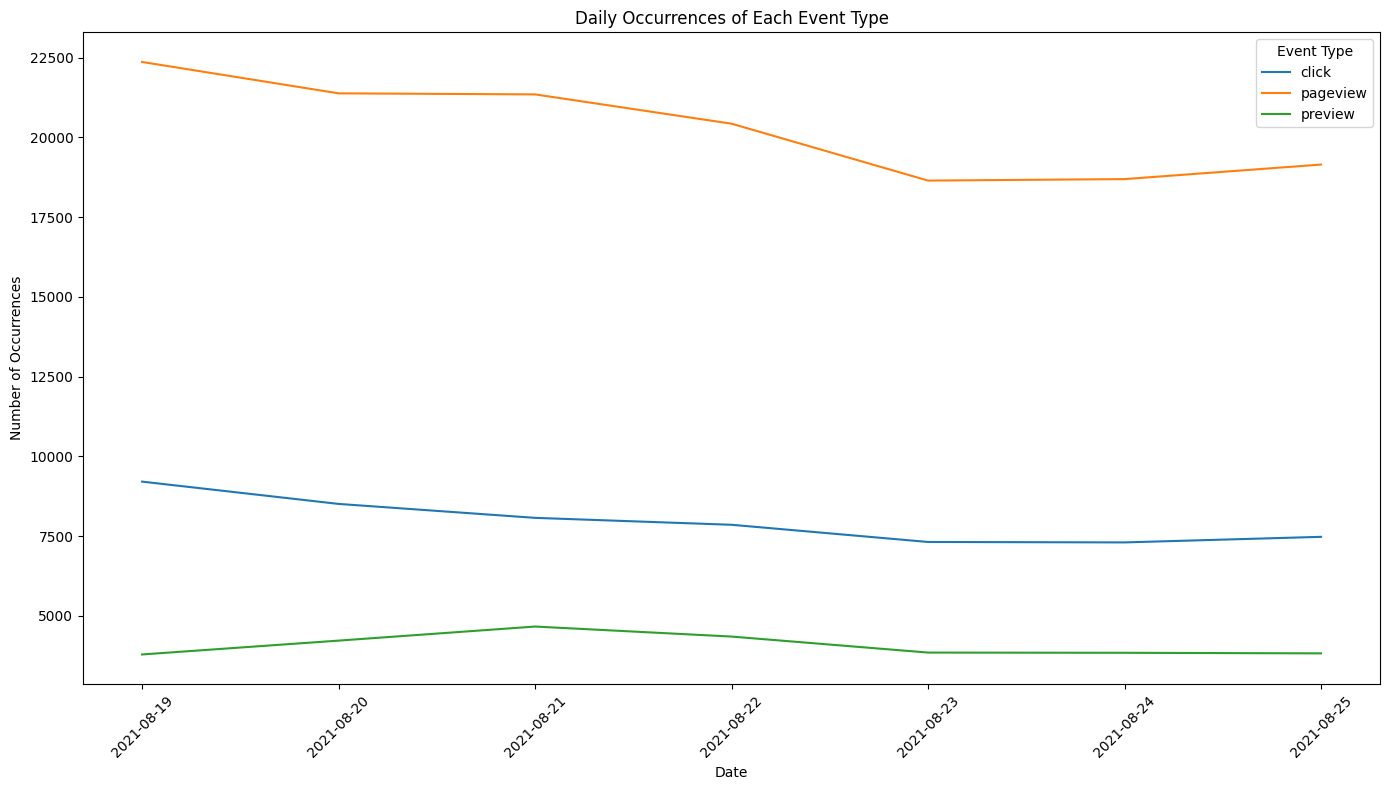

In [61]:
plt.figure(figsize=(14, 8))
for event in daily_event_counts.index:
    plt.plot(daily_event_counts.columns, daily_event_counts.loc[event], label=event)
plt.title('Daily Occurrences of Each Event Type')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend(title='Event Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-62-c5e28e613263>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_daily_events.index, y=average_daily_events.values, palette='plasma')


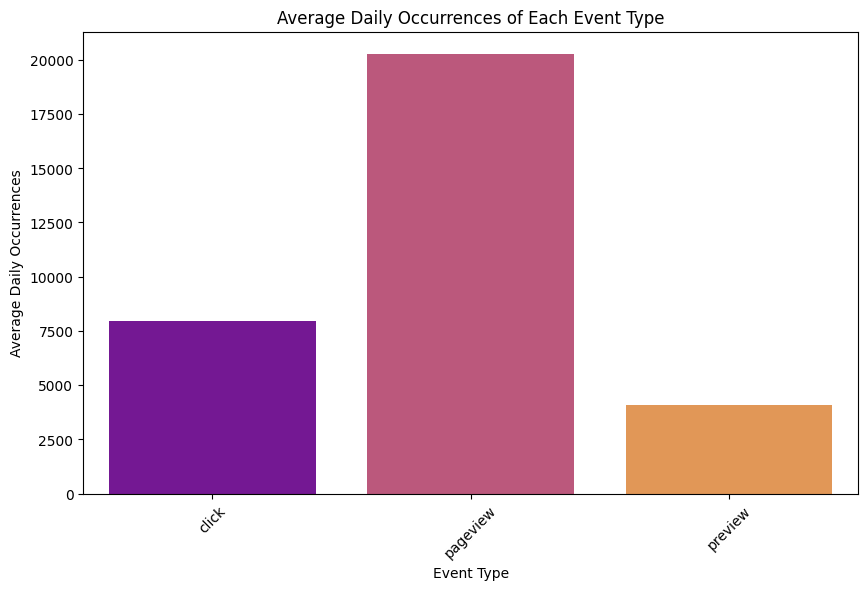

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_daily_events.index, y=average_daily_events.values, palette='plasma')
plt.title('Average Daily Occurrences of Each Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Daily Occurrences')
plt.xticks(rotation=45)
plt.show()

In [63]:
event_counts = df['event'].value_counts()
print("Total Occurrences of Each Event Type:")
print(event_counts)
print("*************************************************")

daily_event_counts = df.groupby(['event', 'date']).size().unstack(fill_value=0)
print("Daily Occurrences of Each Event Type:")
print(daily_event_counts)

print("*************************************************")


average_daily_events = daily_event_counts.mean(axis=1)
print("Average Daily Occurrences of Each Event Type:")
print(average_daily_events)

Total Occurrences of Each Event Type:
event
pageview    142015
click        55732
preview      28531
Name: count, dtype: int64
*************************************************
Daily Occurrences of Each Event Type:
date      2021-08-19  2021-08-20  2021-08-21  2021-08-22  2021-08-23  \
event                                                                  
click           9207        8508        8071        7854        7315   
pageview       22366       21382       21349       20430       18646   
preview         3788        4222        4663        4349        3847   

date      2021-08-24  2021-08-25  
event                             
click           7301        7476  
pageview       18693       19149  
preview         3840        3822  
*************************************************
Average Daily Occurrences of Each Event Type:
event
click        7961.714286
pageview    20287.857143
preview      4075.857143
dtype: float64


The country with the most pageviews is Saudi Arabia with 28873 pageviews.


<ipython-input-64-4f2396b505aa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_pageviews.index, y=country_pageviews.values, palette='coolwarm')


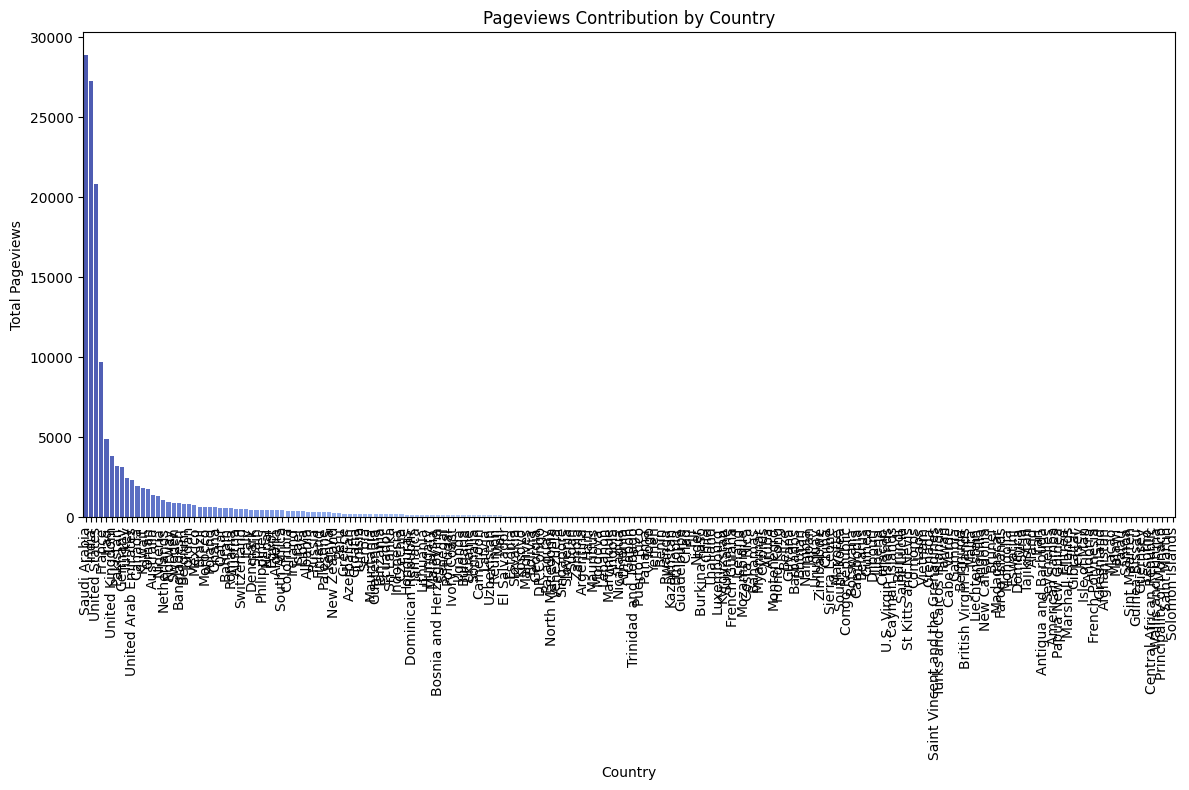

In [64]:
pageview_events = df[df['event'] == 'pageview']

country_pageviews = pageview_events.groupby('country').size().sort_values(ascending=False)

top_country = country_pageviews.idxmax()
top_country_pageviews = country_pageviews.max()

print(f"The country with the most pageviews is {top_country} with {top_country_pageviews} pageviews.")

plt.figure(figsize=(12, 8))
sns.barplot(x=country_pageviews.index, y=country_pageviews.values, palette='coolwarm')
plt.title('Pageviews Contribution by Country')
plt.xlabel('Country')
plt.ylabel('Total Pageviews')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [65]:
country_pageviews = pageview_events.groupby('country').size().sort_values(ascending=False)

# Print the countries and their total pageviews
print("Countries and their total pageviews:")
print(country_pageviews)


Countries and their total pageviews:
country
Saudi Arabia                28873
India                       27286
United States               20839
France                       9674
Iraq                         4897
                            ...  
Central African Republic        1
Wallis and Futuna               1
Principality of Monaco          1
Saint Martin                    1
Solomon Islands                 1
Length: 211, dtype: int64


In [66]:
total_clicks = df[df['event'] == 'click'].shape[0]

total_pageviews = df[df['event'] == 'pageview'].shape[0]

ctr = total_clicks / total_pageviews if total_pageviews > 0 else 0

print(f"Total Clicks: {total_clicks}")
print(f"Total Pageviews: {total_pageviews}")
print(f"Click-Through Rate (CTR): {ctr:.4f}")

Total Clicks: 55732
Total Pageviews: 142015
Click-Through Rate (CTR): 0.3924


In [69]:
total_clicks = df[df['event'] == 'click'].shape[0]
total_pageviews = df[df['event'] == 'pageview'].shape[0]

overall_ctr = total_clicks / total_pageviews if total_pageviews > 0 else 0
print(f"Overall Click-Through Rate (CTR): {overall_ctr:.4f}")

ctr_by_country = (df[df['event'] == 'click'].groupby('country').size() /
                  df[df['event'] == 'pageview'].groupby('country').size()).fillna(0)

print("\nClick-Through Rate (CTR) by country:")
print(ctr_by_country)

Overall Click-Through Rate (CTR): 0.3924

Click-Through Rate (CTR) by country:
country
Afghanistan          0.000000
Albania              0.220930
Algeria              0.291196
American Samoa       0.333333
Andorra              0.000000
                       ...   
Wallis and Futuna    1.000000
Yemen                0.326531
Zambia               0.558824
Zimbabwe             0.277778
Åland                0.250000
Length: 211, dtype: float64


In [70]:
from scipy.stats import chi2_contingency, pearsonr

df['country_encoded'] = df['country'].astype('category').cat.codes

df['click_event'] = (df['event'] == 'click').astype(int)

pearson_corr, p_value = pearsonr(df['country_encoded'], df['click_event'])

print(f"Pearson Correlation between 'country' and 'click_event': {pearson_corr:.4f}")
print(f"P-value for significance: {p_value:.4f}")

contingency_table = pd.crosstab(df['country'], df['click_event'])
chi2, chi2_p_value, _, _ = chi2_contingency(contingency_table)

print(f"\nChi-Square Test:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value for significance: {chi2_p_value:.4f}")


Pearson Correlation between 'country' and 'click_event': -0.0096
P-value for significance: 0.0000

Chi-Square Test:
Chi-Square Statistic: 1972.6547
P-value for significance: 0.0000


#Results


1. **Overall Click-Through Rate (CTR):** The overall CTR is calculated as the ratio of total click events to total pageview events, providing an understanding of user engagement.
2. **CTR by Country:** The CTR varies across different countries, indicating that user engagement differs depending on the country.
3. **Pearson Correlation Analysis:** There is a very weak negative linear correlation (-0.0096) between country and click events, although the result is statistically significant (p-value = 0.0000).
4. **Chi-Square Test for Country and Click Events:** The Chi-Square test shows a significant association between country and click events (Chi-Square statistic = 1972.6547, p-value = 0.0000), suggesting non-random variation in clicks across countries.
5. **Link CTR Variation:** The CTR varies across different links, indicating that certain links perform better at engaging users than others.